In [59]:
# from google.colab import drive

# drive.mount('/content/gdrive')

In [60]:
!pip install tensorflow
!pip install scikit-learn
!pip install keras

In [61]:
import os
ROOT_DIR = os.getcwd()
print("Current working directory:", ROOT_DIR)


Current working directory: c:\Users\vinit\Desktop\Neuromorphic_ASIC_Design


In [62]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("GPU is available!")
else:
    print("GPU is not available.")


GPU is not available.


In [63]:
!pip install ann_visualizer

In [64]:
import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
# from ann_visualizer.visualize import ann_viz

In [65]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

GPU Available: []


In [66]:
# def path_to_csv(file_number):
#     filenumber = str(file_number) + '.csv'
#     # for dirname, _, filenames in os.walk(''):
#     for filename in filenames:
#         if (filename == filenumber):
#             file_path = os.path.join(dirname, filename)
#             # print(os.path.join(dirname, file_number))
#             return file_path

In [67]:
path = 'database\\MIT-BIH Arrhythmia Database.csv'

In [68]:
file_path  = os.path.join(ROOT_DIR, path)

In [69]:
file_path

'c:\\Users\\vinit\\Desktop\\Neuromorphic_ASIC_Design\\database\\MIT-BIH Arrhythmia Database.csv'

In [70]:
# fix random seed for reproducibility
# np.random.seed(7)

In [71]:
# load MIT-BIH dataset
dataset = pd.read_csv(file_path)

In [72]:
# split into input (X) and output (Y) variables
X = dataset.iloc[:,9:13]
X1 = dataset.iloc[:, 2:18]
Y = dataset[['type']]

In [73]:
X

,0_qrs_interval,0_pq_interval,0_qt_interval,0_st_interval
0,41,18,66,7
1,21,4,33,8
2,22,3,32,7
3,22,4,33,7
4,11,4,16,1
...,...,...,...,...
100684,14,3,18,1
100685,13,5,19,1
100686,38,21,67,8
100687,27,5,40,8


In [74]:
X1

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,0_st_interval,0_qrs_morph0,0_qrs_morph1,0_qrs_morph2,0_qrs_morph3,0_qrs_morph4
0,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,18,66,7,-0.026824,-0.001236,0.016659,0.143241,0.996287
1,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,4,33,8,-0.059710,0.104030,0.691891,0.805549,0.084069
2,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,3,32,7,-0.065686,0.051459,0.630419,0.890794,0.091258
3,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,4,33,7,-0.071750,0.059376,0.652814,0.948490,0.136602
4,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,4,16,1,-0.074639,-0.054516,0.052823,0.296038,0.649990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100684,240,241.0,-0.110230,1.420339,1.403346,1.403346,-0.115682,14,3,18,1,-0.115682,-0.106950,0.004810,0.357184,0.949106
100685,241,243.0,-0.119014,1.424782,1.420328,1.420328,-0.134406,13,5,19,1,-0.134406,-0.119884,0.040192,0.311047,0.943879
100686,243,252.0,0.173524,-0.443214,1.436878,-0.714642,-0.136431,38,21,67,8,-0.136431,-0.113058,-0.079363,0.662502,1.022350
100687,252,244.0,-0.119820,-0.401522,1.337051,-0.688560,-0.125076,27,5,40,8,-0.125076,-0.076065,0.361810,1.337051,0.458306


In [75]:
Y

,type
0,N
1,N
2,N
3,N
4,N
...,...
100684,N
100685,N
100686,N
100687,N


In [76]:
# normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X1)

# dataset_normalized = pd.read_csv(scaler.fit_transform(path), columns=path.columns)

In [77]:

# min_max_scaler = preprocessing.MinMaxScaler()
# X_train_scaled = min_max_scaler.fit_transform(X_train)
# X_test_scaled = min_max_scaler.transform(X_test)

# print(scaler.scale_)

X_train_scaled

array([[0.03090823, 0.14563567, 0.4582075 , ..., 0.46292784, 0.504573  ,
        0.71385065],
       [0.14360437, 0.14658444, 0.43992598, ..., 0.57233506, 0.61105336,
        0.55433891],
       [0.1445554 , 0.14943074, 0.43846948, ..., 0.5623748 , 0.62475823,
        0.55559615],
       ...,
       [0.11031859, 0.11669829, 0.4725488 , ..., 0.44736963, 0.58805536,
        0.718408  ],
       [0.11459819, 0.11290323, 0.43013046, ..., 0.51885245, 0.69650374,
        0.61977857],
       [0.1107941 , 0.10910816, 0.4710137 , ..., 0.44490411, 0.46833847,
        0.60518005]])

In [78]:
#Class Renaming
Y.replace(['N','VEB', 'SVEB', 'F', 'Q'], [0,1,2,3,4], inplace=True)

C:\Users\vinit\AppData\Local\Temp\ipykernel_4788\1281512207.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y.replace(['N','VEB', 'SVEB', 'F', 'Q'], [0,1,2,3,4], inplace=True)
C:\Users\vinit\AppData\Local\Temp\ipykernel_4788\1281512207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.replace(['N','VEB', 'SVEB', 'F', 'Q'], [0,1,2,3,4], inplace=True)


In [79]:
Y

,type
0,0
1,0
2,0
3,0
4,0
...,...
100684,0
100685,0
100686,0
100687,0


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled , Y, test_size=0.2, random_state=42)

In [81]:
X_train

array([[0.05563481, 0.14800759, 0.47444369, ..., 0.38952118, 0.40277381,
        0.44931437],
       [0.20874941, 0.21631879, 0.43982464, ..., 0.45954023, 0.49617954,
        0.62750163],
       [0.11364717, 0.11480076, 0.45576006, ..., 0.46877926, 0.52367554,
        0.64345011],
       ...,
       [0.10699001, 0.11669829, 0.4338785 , ..., 0.45734564, 0.55305555,
        0.67467391],
       [0.1616738 , 0.16650854, 0.43913478, ..., 0.65288714, 0.47770755,
        0.4654949 ],
       [0.12791251, 0.12666034, 0.45418771, ..., 0.70079547, 0.95083891,
        0.75894179]])

In [82]:
y_train

,type
73952,1
65959,0
68303,0
79334,1
39614,0
...,...
6265,0
54886,0
76820,0
860,0


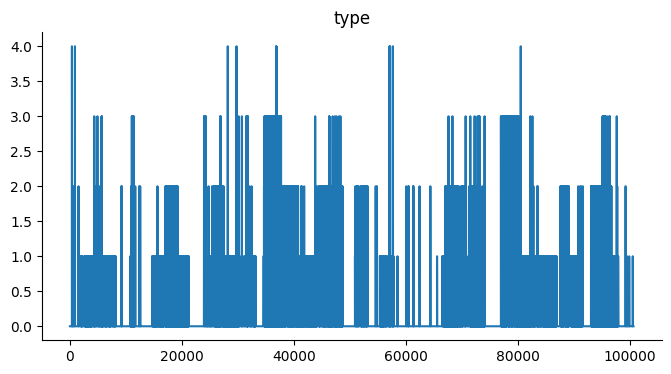

In [83]:
from matplotlib import pyplot as plt
Y['type'].plot(kind='line', figsize=(8, 4), title='type')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

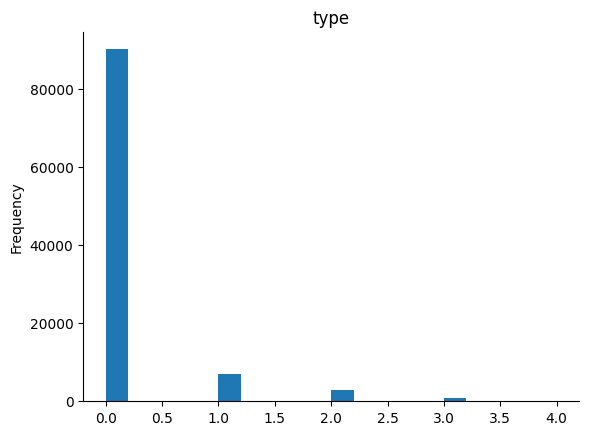

In [84]:
from matplotlib import pyplot as plt
Y['type'].plot(kind='hist', bins=20, title='type')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [85]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=16, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [86]:
# Compile model
from keras.optimizers import Adamax
# my_optimizer = Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)
model.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, epochs=60, batch_size=10,validation_data=(X_val, y_val))
# evaluate the model


Epoch 1/60
8056/8056 [==============================] - 21s 2ms/step - loss: 0.2664 - accuracy: 0.9300 - val_loss: 0.2214 - val_accuracy: 0.9397
Epoch 2/60
8056/8056 [==============================] - 18s 2ms/step - loss: 0.2049 - accuracy: 0.9413 - val_loss: 0.1868 - val_accuracy: 0.9453
Epoch 3/60
8056/8056 [==============================] - 18s 2ms/step - loss: 0.1877 - accuracy: 0.9448 - val_loss: 0.1782 - val_accuracy: 0.9459
Epoch 4/60
8056/8056 [==============================] - 18s 2ms/step - loss: 0.1771 - accuracy: 0.9470 - val_loss: 0.1755 - val_accuracy: 0.9462
Epoch 5/60
8056/8056 [==============================] - 18s 2ms/step - loss: 0.1637 - accuracy: 0.9486 - val_loss: 0.1643 - val_accuracy: 0.9483
Epoch 6/60
8056/8056 [==============================] - 18s 2ms/step - loss: 0.1529 - accuracy: 0.9515 - val_loss: 0.1445 - val_accuracy: 0.9518
Epoch 7/60
8056/8056 [==============================] - 18s 2ms/step - loss: 0.1452 - accuracy: 0.9535 - val_loss: 0.1386 - val_ac

In [87]:
model

In [88]:
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


2518/2518 [==============================] - 4s 2ms/step - loss: 0.0716 - accuracy: 0.9782

accuracy: 97.82%


In [55]:
# Save model
model.save('model1_ECG.h5')

file_path = os.path.join(ROOT_DIR, 'model1_ECG_16_20_20_5.h5')
model.save(file_path)

c:\Users\vinit\Desktop\Neuromorphic_ASIC_Design\env1\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [56]:
# from google.colab import files

# # Download the file
# files.download('model1_ECG.h5')

In [ ]:
# Visualization
# from keras.layers import Dense
# from ann_visualizer.visualize import ann_viz

# ann_viz(model, title="My graph")

In [58]:
import numpy as np
from keras.models import load_model
from sklearn import metrics

# Load the trained model
file_path = os.path.join(ROOT_DIR, 'model1_ECG_16_20_20_5.h5')
model = load_model(file_path)

# Assuming you have new data 'X_new' in a NumPy array
# Replace 'X_new' with your actual input data
df = pd.read_csv(path)
X_new = df.iloc[80535:80545,2:18]

print(X_new)

# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_new)


# Make predictions
y_pred = model.predict(X_test_scaled)

# Print or use the predictions
print(y_pred)


# print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

# print("*** Confusion Matrix ***")
# print(metrics.confusion_matrix(y_val, y_pred))

       0_pre-RR  0_post-RR   0_pPeak   0_tPeak   0_rPeak   0_sPeak   0_qPeak  \
80535       142      475.0  0.374967  0.864401  1.231756 -1.563750  0.312146   
80536       475      243.0 -0.038764  0.532946  1.549880 -0.907838 -0.045855   
80537       292      490.0  0.061402 -0.841308  1.198001 -0.842962  0.036835   
80538       490      285.0 -0.035138  0.480962  1.498671 -0.747598 -0.054817   
80539       285      286.0  0.018809  0.374950  1.481828 -0.821432 -0.102613   
80540       286      307.0 -0.023164  0.441048  1.470028 -0.853028 -0.025316   
80541       307      321.0 -0.096018 -0.445309  1.484372 -0.447734 -0.096632   
80542       321      145.0  0.001694 -0.567204  1.417283 -0.572898 -0.120361   
80543       145      475.0  0.437648  0.903305  1.264013 -1.408824  0.419178   
80544       475      302.0 -0.071585  0.482076  1.543105 -0.835073 -0.078378   

       0_qrs_interval  0_pq_interval  0_qt_interval  0_st_interval  \
80535              37             14            1